In [162]:
from __future__ import print_function, division

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score #mean_squared_error, r2_score
from sklearn.metrics import recall_score
from sklearn.externals import joblib #alt to pickling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
import seaborn as sns
import statsmodels.api as sm
import random
%matplotlib inline
RANDOM_SEED = random.randint(0,10000)
RANDOM_SEED = 4607
random.seed(RANDOM_SEED)

In [163]:
#y.value_counts()

In [164]:
sqldata = pd.read_csv('combined_wine.csv')
sqldata.drop(columns=['Unnamed: 0', 'id'], inplace = True)

permutedsqldata = sqldata.sample(frac = 1)#

X = permutedsqldata.drop(['quality','premium'], axis = 1)
y = permutedsqldata.premium
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = RANDOM_SEED)

In [165]:
# support code

def quick_test(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = RANDOM_SEED)#42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return (recall, precision)

def quick_test_afew_times(model, X, y, n=20):
    rs = np.array([])
    ps = np.array([])
    for j in range(n):
        (r,p) = quick_test(model, X, y)
        rs = np.append(rs,r)
        ps = np.append(ps,p)
    return (np.mean(rs), np.mean(ps))


In [166]:
# Logistic Regression
#logit = sm.Logit(y,sm.add_constant(X))
logreg = LogisticRegression()
recall = {}
precision = {}
z,w = quick_test_afew_times(logreg, X, y)
print(z,w)
class_name = "lr"
recall[class_name]=z
precision[class_name]=w

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.21008403361344538 0.602409638554217


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [167]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=20)
z,w = quick_test_afew_times(knn, X, y)
print(z,w)
class_name = "knn"
recall[class_name]=z
precision[class_name]=w

0.08823529411764705 0.5384615384615384


In [168]:
# NB
nb = GaussianNB()
z,w = quick_test_afew_times(nb, X, y)


print(z,w)
class_name = "nb"
recall[class_name]=z
precision[class_name]=w

0.6092436974789914 0.37859007832898167


In [169]:
# SVM
from sklearn import svm 
linearsvc = svm.SVC(max_iter=15000, probability=True)

# Do the test 10 times with a LinearSVC and get the average score
z,w = quick_test_afew_times(linearsvc, X, y)
print(z,w)
class_name = "svm"
recall[class_name]=z
precision[class_name]=w

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.32773109243697474 0.6964285714285714


In [170]:
# Decision Trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(max_depth=5)
z,w = quick_test_afew_times(decisiontree, X, y)
print(z,w)
class_name = "dt"
recall[class_name]=z
precision[class_name]=w

0.25630252100840334 0.6099999999999999


In [171]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=10, random_state=RANDOM_SEED)
z,w = (quick_test_afew_times(clf, X, y))

print(z,w)
class_name = "clf"
recall[class_name]=z
precision[class_name]=w

clf.fit(X, y)  
print(clf.feature_importances_)
print(X.head())

0.4789915966386554 0.76
[0.05573727 0.08679539 0.07538979 0.07570382 0.08796406 0.06903902
 0.06980009 0.12282668 0.07108694 0.07307621 0.2094151  0.00316563]
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5812            6.5             0.380         0.53            1.40      0.142   
1929            6.4             0.320         0.35            4.80      0.030   
3038            6.1             0.250         0.49            7.60      0.052   
2726            6.4             0.125         0.29            5.85      0.042   
30              6.7             0.675         0.07            2.40      0.089   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
5812                  5.0                  69.0   0.9926  3.14       0.52   
1929                 34.0                 101.0   0.9912  3.36       0.60   
3038                 67.0                 226.0   0.9956  3.16       0.47   
2726                 24.0                  99.

sum(y)/len(y) #Note to Self: guessing ordinary w/b right 80.4% w/ 0 precision



number of True Positives / Number of All Positives
since didn't make any positive guesses, not defined

Specificity = True Negs / all negatives
guessed 80.4% Negs and there were 80.4% were neg so specificity = 1
This particular strategy will have True Pos / TruePos plus Fals Neg
#We want PRECISION =  TP/ All Postive True postive w/b 20% 
Sesitivity = Recall = True Pos / True Pos + Falsed Negs
In this case need to get sensitivity = recall  = TP / TPs + FNs = above 0% 




In [172]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

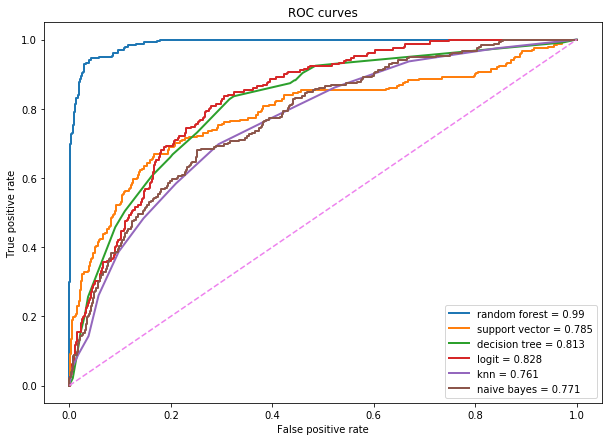

In [173]:
# List of our models
models = [clf, linearsvc, decisiontree, logreg, knn, nb]
model_names = ['random forest', 'support vector', 'decision tree', 'logit', 'knn', 'naive bayes']

fig, ax = plt.subplots(figsize=(10,7))
for index, model in enumerate(models):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr,lw=2, label=model_names[index] + ' = ' + str(round(roc_score, 3)))

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves');

In [174]:
cutoff = .5 #start with default of .5

models = [clf, logreg, knn, nb, linearsvc, decisiontree]
y_pred = clf.predict_proba(X_test)[:,1]

y_class = []

for i in y_pred: #recall that y_preds ar probabilities and this func is turning to 1 or 0
    if i >= cutoff:
        y_class.append(1)
    else:
        y_class.append(0)
            
conf_mat = metrics.confusion_matrix(y_test, y_class)
'''
plt.figure(dpi=80)
sns.heatmap(conf_mat, cmap=plt.cm.Reds, annot=True, square=True, fmt='d', annot_kws={"size": 20},
           xticklabels=['not', 'premium '],
           yticklabels=['not', 'premium']);
plt.xlabel('prediction')
plt.ylabel('actual');
'''           

'\nplt.figure(dpi=80)\nsns.heatmap(conf_mat, cmap=plt.cm.Reds, annot=True, square=True, fmt=\'d\', annot_kws={"size": 20},\n           xticklabels=[\'not\', \'premium \'],\n           yticklabels=[\'not\', \'premium\']);\nplt.xlabel(\'prediction\')\nplt.ylabel(\'actual\');\n'

In [175]:
conf_mat

array([[1059,    3],
       [  67,  171]])

In [176]:
#y_class

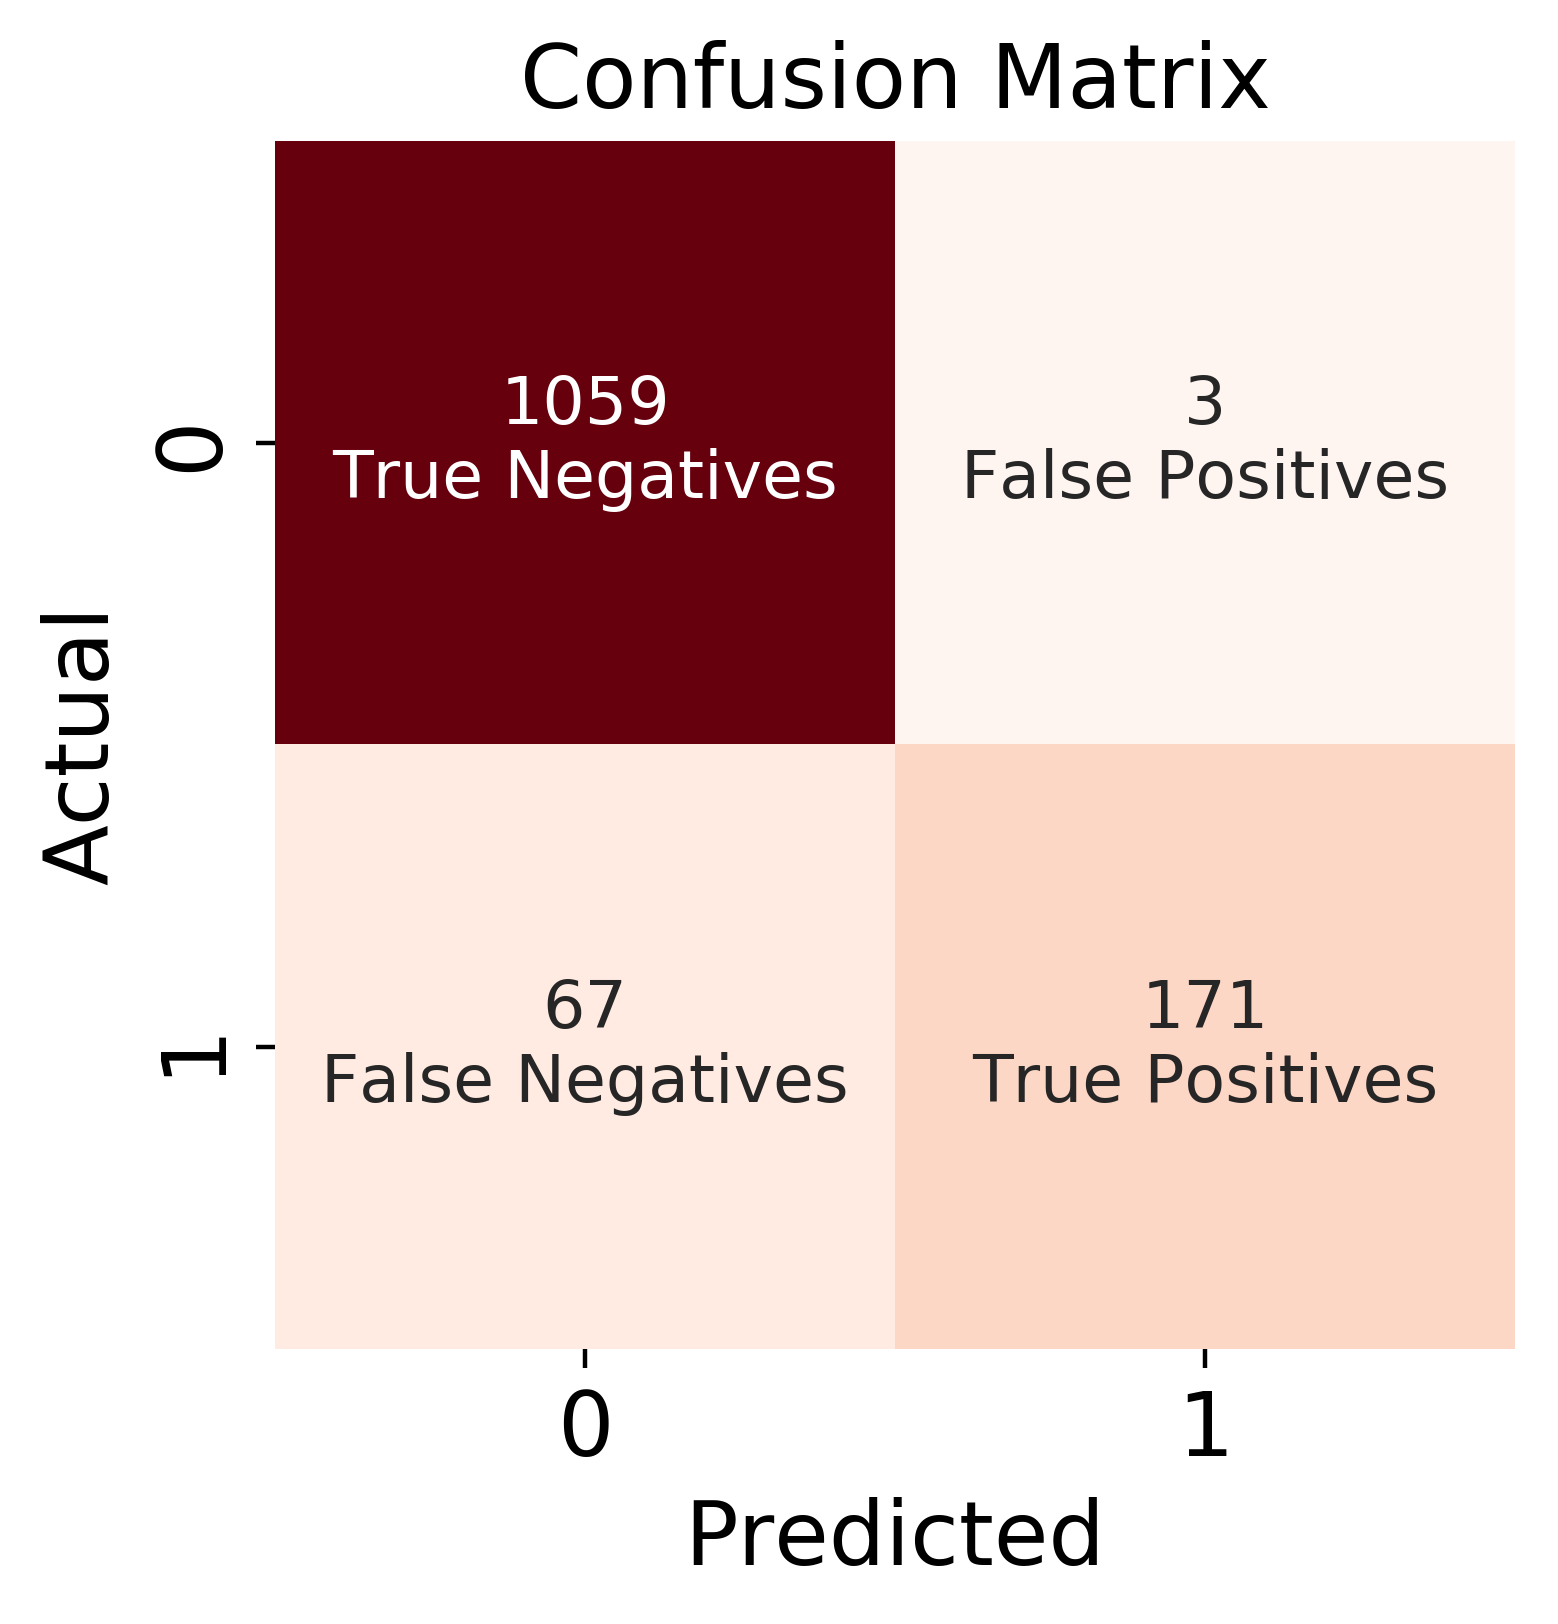

In [177]:
plt.figure(figsize=(4,4),dpi=400)

confusion = metrics.confusion_matrix(y_test,y_class)

ax = sns.heatmap(confusion, annot=True, cmap='Reds', cbar=False,
               annot_kws={"size": 12}, fmt='g')

# Creating labels for cells of matrix
cmlabels = ['True Negatives', 'False Positives',
             'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])


plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
plt.title('Confusion Matrix', fontsize = 16)
labels = ['0', '1']
ax.set_xticklabels(labels, size = 16)
ax.set_yticklabels(labels, size = 16, va='center');

In [178]:
print(RANDOM_SEED)

4607


In [179]:
print("Recall = ", recall)

Recall =  {'lr': 0.21008403361344538, 'knn': 0.08823529411764705, 'nb': 0.6092436974789914, 'svm': 0.32773109243697474, 'dt': 0.25630252100840334, 'clf': 0.4789915966386554}


In [180]:
print("Precision = ", precision)

Precision =  {'lr': 0.602409638554217, 'knn': 0.5384615384615384, 'nb': 0.37859007832898167, 'svm': 0.6964285714285714, 'dt': 0.6099999999999999, 'clf': 0.76}
